In [2]:
# Import of relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#modules for importing the data from sql
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [4]:
# Preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# modelling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance


#metrics
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer

RSEED = 45

/Users/andi/neuefische/hdd-anomaly-detection/.venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Importing only failure

In [10]:
#read the database string from the .env
load_dotenv('../.env')

DB_STRING = os.getenv('DB_STRING')
db = create_engine(DB_STRING)

# #import the data to a pandas dataframe
# query_string = 'SELECT * FROM "2021"'
query_string = """SELECT * FROM "2021"
                    WHERE date >= '2021-10-01'
                    AND date <= '2021-12-31'
                    AND failure = '1';
                    """
                    # GROUP BY model;"""
# query_string = """SELECT * FROM "2021"
#                 WHERE model = 'ST12000NM0008' AND date = '2021-10-10'
#                 LIMIT 1000;"""
df_sqlalchemy_failure = pd.read_sql(query_string, db)
# df_sqlalchemy

In [ ]:
df_2021_10_12 = df_sqlalchemy_failure

In [ ]:
df_2021_10_12.head()
df_2021_10_12.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=179)

In [ ]:
df_2021_10_12.groupby('model').count().sort_values('failure', ascending=False).reset_index().head(5)

,model,date,serial_number,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,ST4000DM000,104,104,104,104,104,104,0,0,104,...,0,0,0,0,0,0,0,0,0,0
1,HP SSD S700 250GB,103,103,103,103,103,103,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TOSHIBA MG07ACA14TA,89,89,89,89,89,89,89,89,89,...,0,0,0,0,0,0,0,0,0,0
3,ST12000NM0008,66,66,66,66,65,65,0,0,65,...,0,0,0,0,0,0,0,0,0,0
4,ST8000NM0055,64,64,64,64,61,61,0,0,61,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import os  
os.makedirs('../data/Saved_CSV', exist_ok=True)  
df_2021_10_12.to_csv('../data/Saved_CSV/2021-10_and_11.csv')  

In [ ]:
df_2021_10_12.head()
df_2021_10_12['capacity_bytes'] = df_2021_10_12['capacity_bytes']/1000**3 #transforming with base 10 instead of 10 without RENAMING!
df_2021_10_12.head(20)
#df_2021_10_12.info()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2021-12-31,2112E58C64F6,CT250MX500SSD1,250.059350,1,100.0,0.000000e+00,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,None,None
1,2021-12-26,2140E5D8CF37,CT250MX500SSD1,250.059350,1,100.0,0.000000e+00,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,None,None
2,2021-10-07,PL1331LAGTW9RH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,133.0,104.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None
3,2021-10-08,PL2331LAGSTGTJ,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,134.0,101.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None
4,2021-10-24,PL1331LAHGVRAH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,135.0,99.0,142.0,...,None,None,None,None,None,None,NaN,NaN,None,None
5,2021-11-27,PL1331LAHGVSJH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,134.0,103.0,126.0,...,None,None,None,None,None,None,NaN,NaN,None,None
6,2021-12-19,PL1331LAHGMVUH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,133.0,104.0,141.0,...,None,None,None,None,None,None,NaN,NaN,None,None
7,2021-11-24,PL1331LAHD2SAH,HGST HMS5C4040BLE640,4000.787030,1,48.0,1.058619e+09,134.0,100.0,143.0,...,None,None,None,None,None,None,NaN,NaN,None,None
8,2021-12-15,PL1331LAHGBSGH,HGST HMS5C4040BLE640,4000.787030,1,100.0,0.000000e+00,134.0,102.0,129.0,...,None,None,None,None,None,None,NaN,NaN,None,None
9,2021-12-11,PL1331LAHD07YH,HGST HMS5C4040BLE640,4000.787030,1,100.0,0.000000e+00,134.0,103.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None


In [ ]:
df_ST4000DM000 = df_2021_10_12[df_2021_10_12['model'] =='ST4000DM000']
df_ST4000DM000.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
323,2021-10-01,Z304MKJL,ST4000DM000,4000.78703,1,116.0,114682872.0,NaN,NaN,92.0,...,None,None,None,None,None,None,NaN,NaN,None,None
324,2021-10-02,Z304HTJ6,ST4000DM000,4000.78703,1,117.0,143235240.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None
325,2021-10-02,Z304GR8P,ST4000DM000,4000.78703,1,120.0,244003688.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None
326,2021-10-02,S301L4XY,ST4000DM000,4000.78703,1,102.0,5071976.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None
327,2021-10-03,Z3041JEN,ST4000DM000,4000.78703,1,119.0,228196584.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None


In [ ]:
features_imp = ['failure','smart_5_raw','smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']
features_norm = ['failure','smart_5_normalized','smart_187_normalized', 'smart_188_normalized', 'smart_197_normalized', 'smart_198_normalized']

array([[<AxesSubplot:title={'center':'failure'}>,
        <AxesSubplot:title={'center':'smart_5_raw'}>,
        <AxesSubplot:title={'center':'smart_187_raw'}>,
        <AxesSubplot:title={'center':'smart_188_raw'}>],
       [<AxesSubplot:title={'center':'smart_197_raw'}>,
        <AxesSubplot:title={'center':'smart_198_raw'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

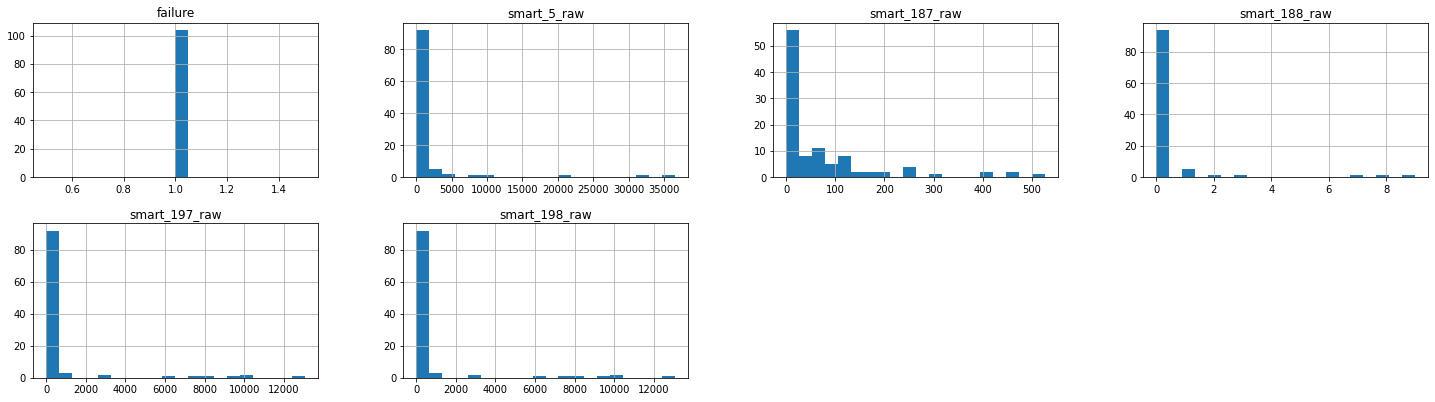

In [ ]:
df_ST4000DM000[features_imp].hist(bins=20, figsize=(25, 25), layout=(7, 4))

In [ ]:
#Correlation and heatmap
corr_mtrx = df_ST4000DM000[features_imp][1:].corr()
corr_mtrx
#plt.figure(figsize = (15,15))
#ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
failure,NaN,NaN,NaN,NaN,NaN,NaN
smart_5_raw,NaN,1.000000,0.366065,0.757508,0.204462,0.204462
smart_187_raw,NaN,0.366065,1.000000,0.162938,0.341638,0.341638
smart_188_raw,NaN,0.757508,0.162938,1.000000,0.029354,0.029354
smart_197_raw,NaN,0.204462,0.341638,0.029354,1.000000,1.000000
smart_198_raw,NaN,0.204462,0.341638,0.029354,1.000000,1.000000


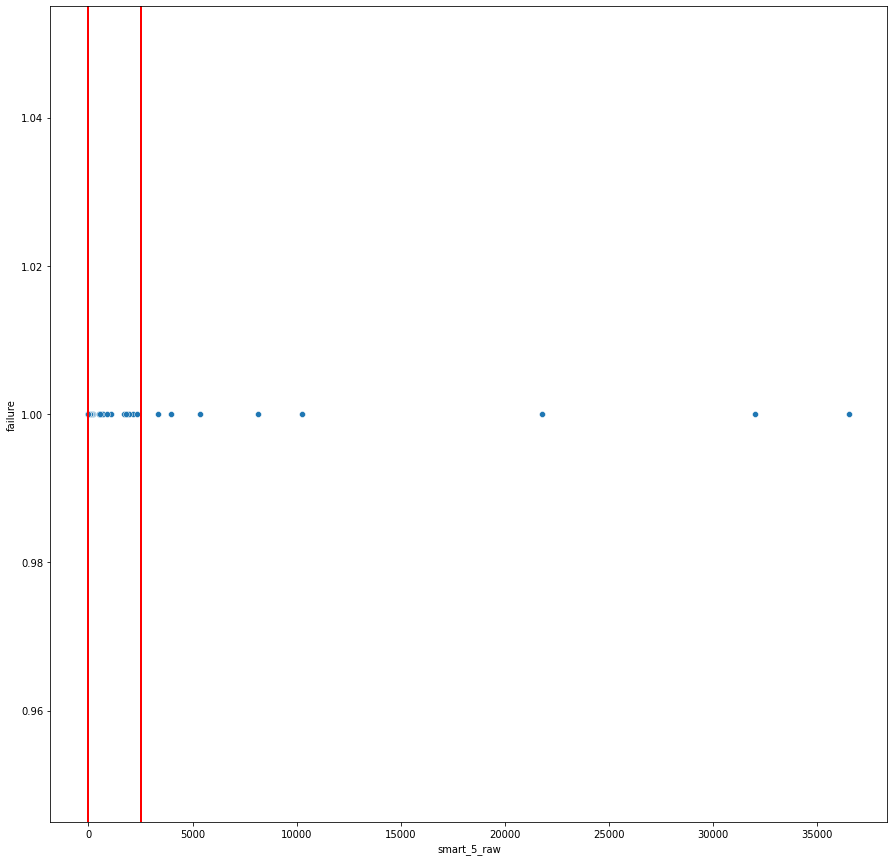

In [ ]:
plt.figure(figsize = (15,15))
graph = sns.scatterplot(x=df_ST4000DM000.smart_5_raw, y=df_ST4000DM000.failure)
# graph.axhline(35, linewidth=2, color='r')
graph.axvline(0, linewidth=2, color='r')
graph.axvline(2500, linewidth=2, color='r')

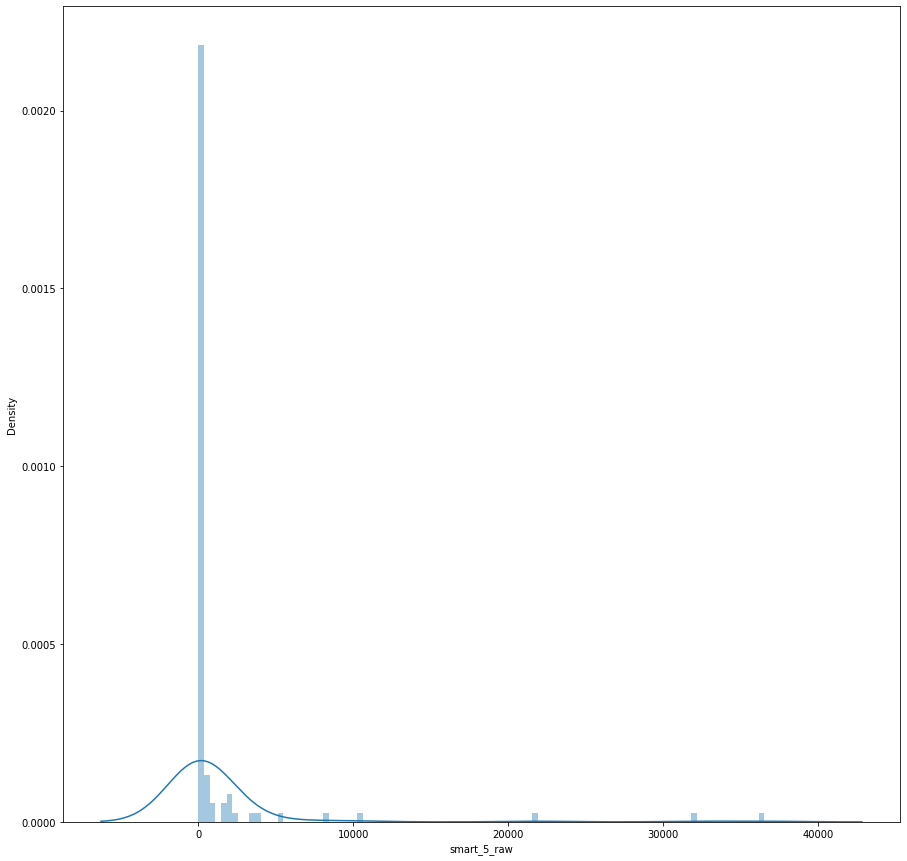

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlim() 
sns.distplot(df_ST4000DM000.smart_5_raw, bins=100, hist_kws={'alpha': 0.4});

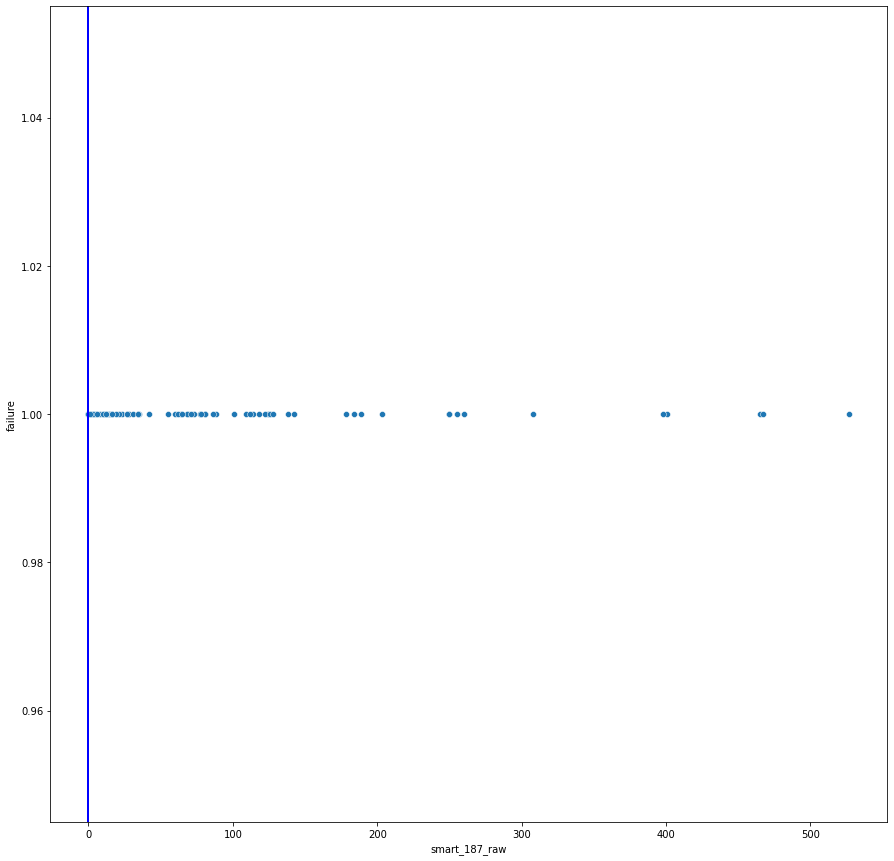

In [ ]:
plt.figure(figsize = (15,15))
graph = sns.scatterplot(x=df_ST4000DM000.smart_187_raw, y=df_ST4000DM000.failure)
# graph.axhline(35, linewidth=2, color='r')
graph.axvline(0, linewidth=2, color='b')
# graph.axvline(2500, linewidth=2, color='r')

In [ ]:
df_ST4000DM000.smart_187_raw
print(df_ST4000DM000.smart_187_raw.describe())


count    104.000000
mean      69.711538
std      111.253116
min        0.000000
25%        0.000000
50%       16.000000
75%       86.500000
max      527.000000
Name: smart_187_raw, dtype: float64


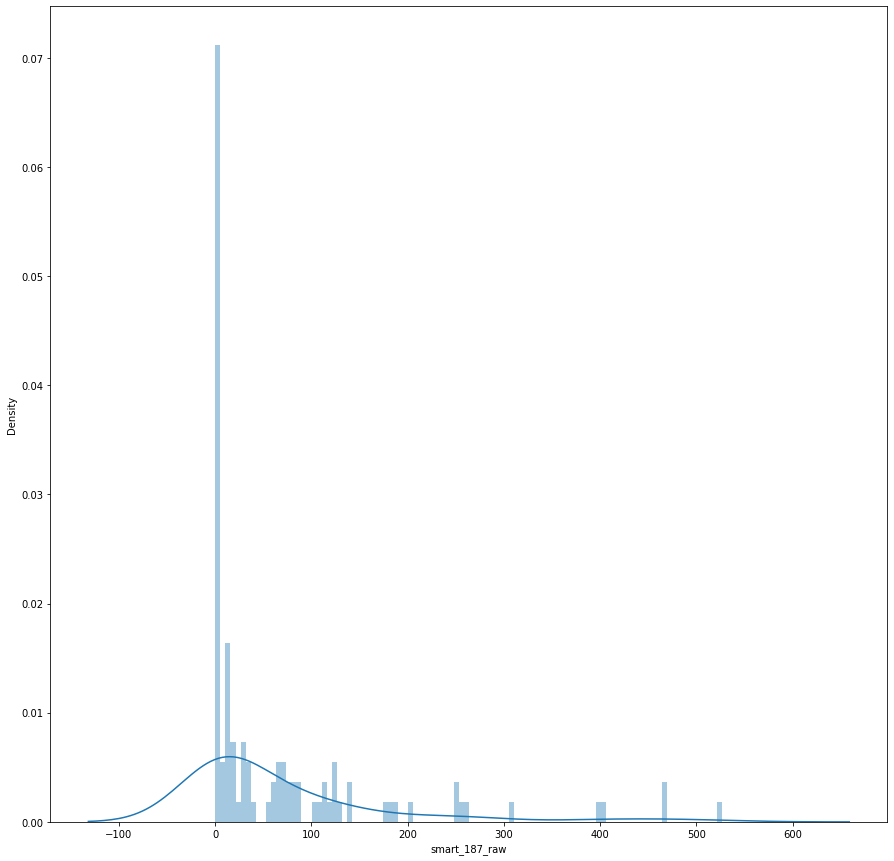

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlim() 
sns.distplot(df_ST4000DM000.smart_187_raw, bins=100, hist_kws={'alpha': 0.4});

## Importing only without failure yet

In [ ]:
query_string_0 = """SELECT * FROM "2021"
                    WHERE date >= '2021-10-01'
                    AND date <= '2021-12-31'
                    AND model = 'ST4000DM000'
                    AND failure = '0';
                    """
                    # GROUP BY model;"""
# query_string = """SELECT * FROM "2021"
#                 WHERE model = 'ST12000NM0008' AND date = '2021-10-10'
#                 LIMIT 1000;"""
df_sqlalchemy_no_failure = pd.read_sql(query_string_0, db)

In [ ]:
df_2021_10_12_no_failure = df_sqlalchemy_no_failure

In [ ]:
df_2021_10_12_no_failure.shape

(1753381, 179)

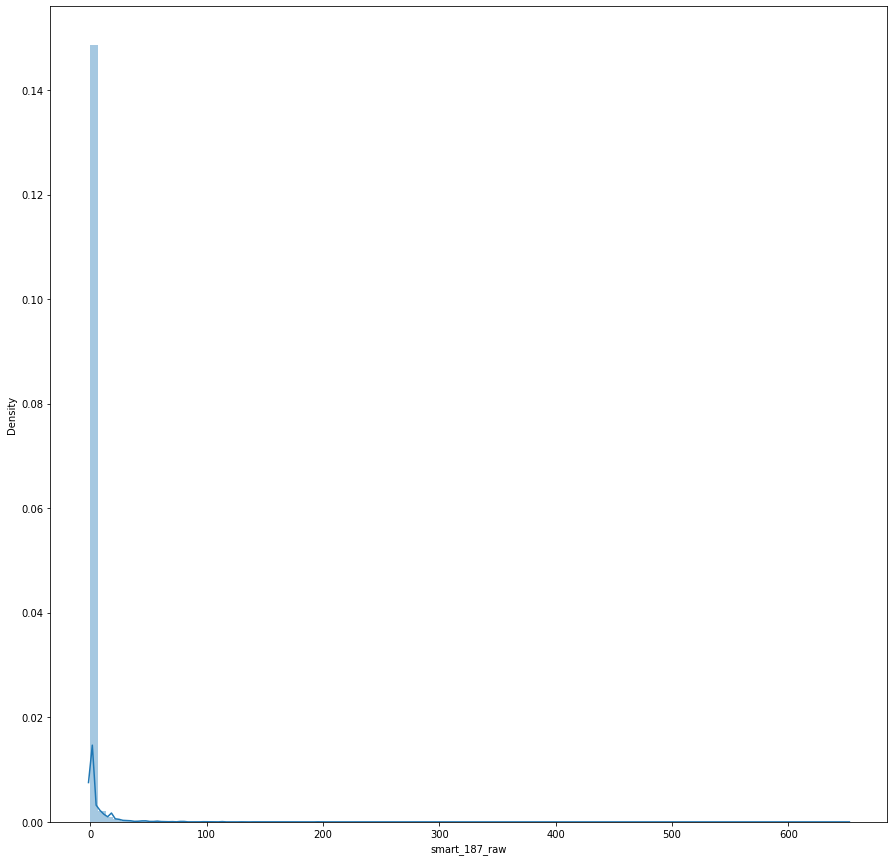

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlim() 
sns.distplot(df_2021_10_12_no_failure.smart_187_raw, bins=100, hist_kws={'alpha': 0.4});

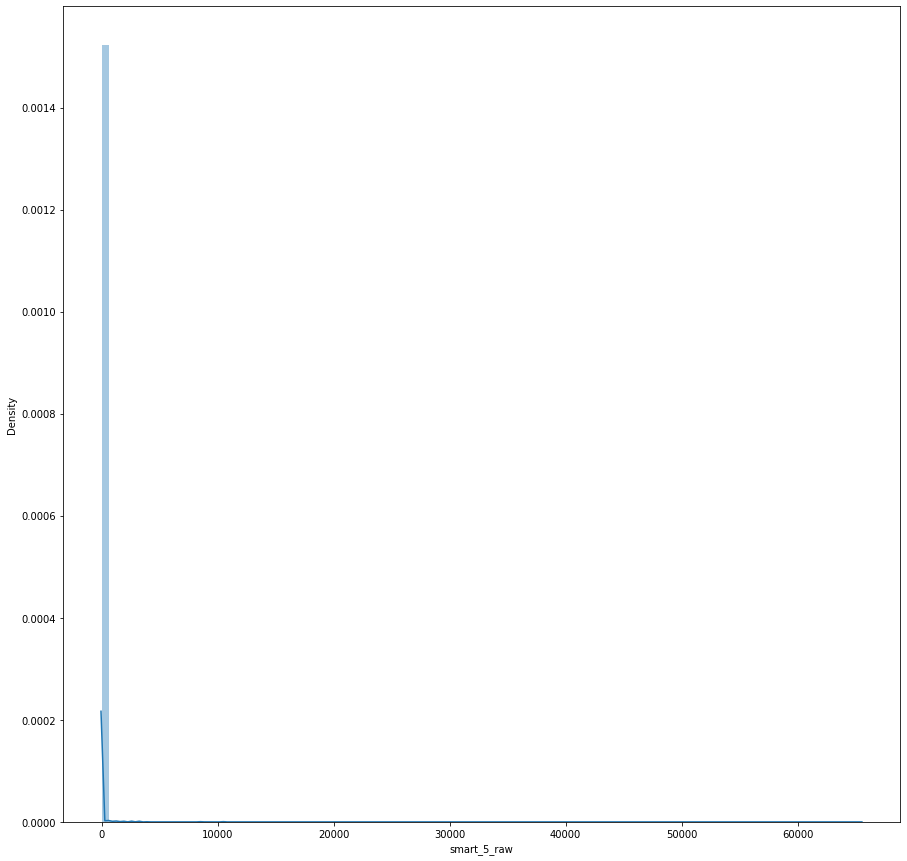

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlim() 
sns.distplot(df_2021_10_12_no_failure.smart_5_raw, bins=100, hist_kws={'alpha': 0.4});

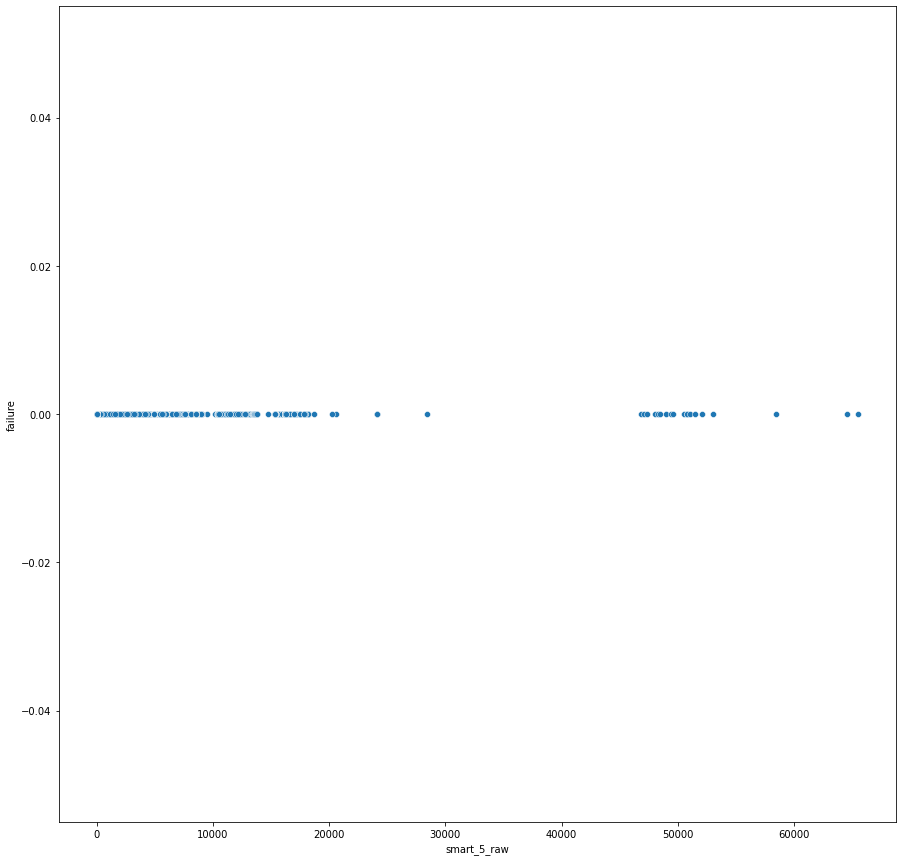

In [ ]:
plt.figure(figsize = (15,15))
graph = sns.scatterplot(x=df_2021_10_12_no_failure.smart_5_raw, y=df_2021_10_12_no_failure.failure)
# graph.axhline(35, linewidth=2, color='r')
#graph.axvline(0, linewidth=2, color='r')
#graph.axvline(2500, linewidth=2, color='r')

In [ ]:
df_source = pd.read_csv('../data/data_q4_2021/2021-10-01.csv', parse_dates=["date"])
df_source.head()
#df_source.info()


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2021-10-01,ZLW18P9K,ST14000NM001G,14000519643136,0,84.0,224809696.0,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,ZLW0EGC7,ST12000NM001G,12000138625024,0,84.0,227542336.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-01,ZA1FLE1P,ST8000NM0055,8001563222016,0,82.0,169835352.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-01,ZA16NQJR,ST8000NM0055,8001563222016,0,83.0,198392224.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-01,1050A084F97G,TOSHIBA MG07ACA14TA,14000519643136,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Importing all data about this model

In [ ]:
query_string_all = """SELECT * FROM "2021"
                    WHERE date >= '2021-10-01'
                    AND date <= '2021-12-31'
                    AND model = 'ST4000DM000'
                    """
                    # GROUP BY model;"""
# query_string = """SELECT * FROM "2021"
#                 WHERE model = 'ST12000NM0008' AND date = '2021-10-10'
#                 LIMIT 1000;"""
df_sqlalchemy_all = pd.read_sql(query_string_all, db)

In [ ]:
df_2021_10_12_all = df_sqlalchemy_all

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw


In [ ]:
# Checking for missing values (a lot of SMART Features are missing)
missing = pd.DataFrame(df_2021_10_12_all.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/df_2021_10_12_all.shape[0])*100, 2)
missing[missing['Amount'] != 0]


,Amount,Percentage


In [ ]:
# give meaningful column names
missing.columns = ['columns', 'Amount', 'Percentage']

# create a list containing the column names which have more than specified percentage of missing values
drop_columns = missing.query('Percentage > 50')['columns'].to_list()
#drop_columns = missing.query('Percentage > 50').index.values.tolist()

# drop the columns with too much missing values from the data frame
test_model_total.drop(drop_columns, axis=1, inplace=True)

## OR
#drop_columns = test_model_total.describe().T.query('mean == 0').reset_index()['index'].to_list()
#test_model_total.drop(drop_columns, axis=1, inplace=True)

test_model_total.shape

In [ ]:
# # create a data frame for the overview about the isnull values and a series containing the total count of the data frame
# isnull = test_model_history.isnull().sum().reset_index(name='isnull')
# total = pd.Series([test_model_history.shape[0] for _ in range(len(isnull))])

# # create a dictionary and concat the the data to the data frame
# data = {'isnull': isnull, 
#         'total': total}

# isnull = pd.concat(data, axis=1, ignore_index=True)

# # give meaningful column names
# isnull.columns = ['columns', 'isnull', 'total']

# # add extra column containing the percentage of missing data per column
# isnull['percentage_of_missing'] = isnull['isnull'] / isnull['total'] * 100

# # create a list containing the column names which have more than specified percentage of missing values
# drop_columns = isnull.query('percentage_of_missing > 40')['columns'].to_list()

# # drop the columns with too much missing values from the data frame
# test_model_history.drop(drop_columns, axis=1, inplace=True)

In [ ]:
drop_columns = missing.query('Percentage > 50')['Index'].to_list()

In [ ]:
df_2021_10_12_all.head()

df_2021_10_12_all_failure = df_2021_10_12_all[df_2021_10_12_all['failure'] == 1]
df_2021_10_12_all_failure.head()


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
3942,2021-10-01,Z304MKJL,ST4000DM000,4000787030016,1,116.0,114682872.0,None,None,92.0,...,None,None,None,None,None,None,None,None,None,None
17009,2021-10-02,Z304HTJ6,ST4000DM000,4000787030016,1,117.0,143235240.0,None,None,91.0,...,None,None,None,None,None,None,None,None,None,None
20243,2021-10-02,Z304GR8P,ST4000DM000,4000787030016,1,120.0,244003688.0,None,None,91.0,...,None,None,None,None,None,None,None,None,None,None
24731,2021-10-02,S301L4XY,ST4000DM000,4000787030016,1,102.0,5071976.0,None,None,91.0,...,None,None,None,None,None,None,None,None,None,None
47286,2021-10-03,Z3041JEN,ST4000DM000,4000787030016,1,119.0,228196584.0,None,None,91.0,...,None,None,None,None,None,None,None,None,None,None


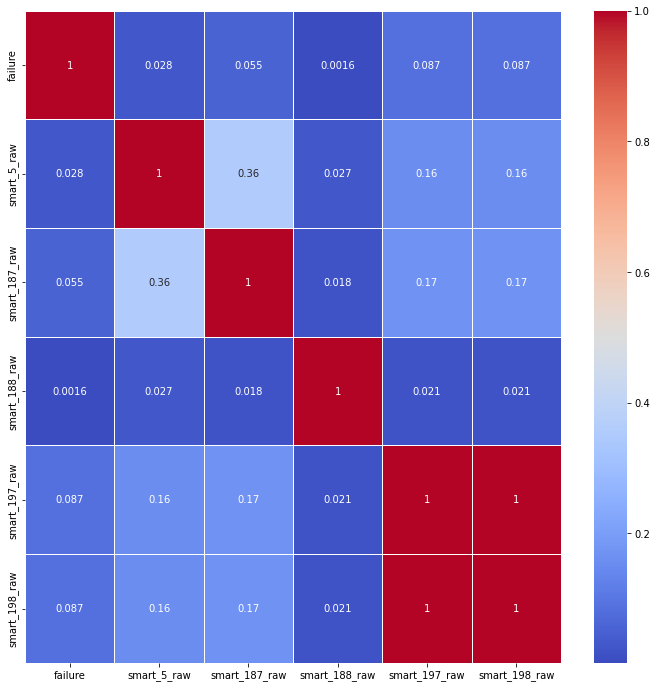

In [ ]:
#Correlation and heatmap
corr_mtrx = df_2021_10_12_all[features_imp].corr()
corr_mtrx
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

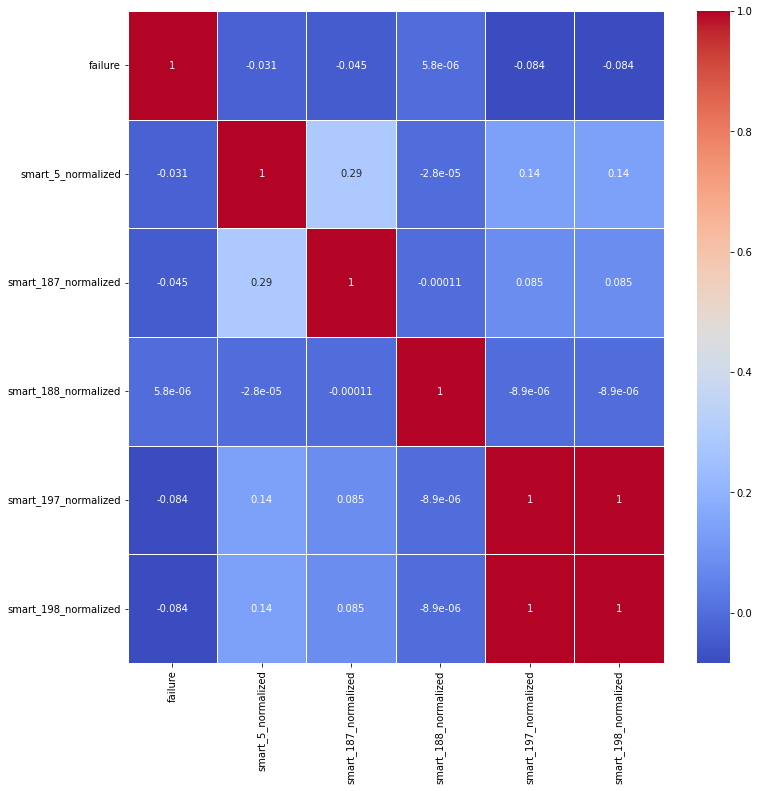

In [ ]:
#Correlation and heatmap
corr_mtrx = df_2021_10_12_all[features_norm].corr()
corr_mtrx
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

## Working with reduced and preprocessed data


In [5]:
# # load the data set from CSV file
HDD_ST4000DM000= pd.read_csv('../data/Daniela/ST4000DM000_processed_relevant.csv', parse_dates=['date'])

In [6]:
HDD_ST4000DM000.head()


,date,serial_number,model,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,date_failure,countdown
0,2020-09-15,Z304KBK4,ST4000DM000,0,113.0,53991680.0,92.0,14.0,100.0,0.0,...,100.0,0.0,100.0,0.0,0.0,43260.0,5.936166e+10,3.123054e+11,2021-12-16,457.0
1,2020-09-15,Z304JGH0,ST4000DM000,0,111.0,31142392.0,91.0,13.0,100.0,0.0,...,100.0,0.0,100.0,0.0,0.0,42459.0,5.902419e+10,2.553616e+11,2021-01-14,121.0
2,2020-09-15,Z302SYHL,ST4000DM000,0,120.0,238681648.0,92.0,22.0,100.0,0.0,...,99.0,184.0,99.0,184.0,0.0,43769.0,6.132206e+10,2.526737e+11,2021-05-22,249.0
3,2020-09-15,S3010L7K,ST4000DM000,0,118.0,180888736.0,94.0,6.0,100.0,0.0,...,100.0,0.0,100.0,0.0,0.0,46589.0,6.335880e+10,2.237496e+11,2020-12-11,87.0
4,2020-09-15,Z304JM6A,ST4000DM000,0,114.0,59625576.0,92.0,16.0,100.0,0.0,...,100.0,0.0,100.0,0.0,0.0,43281.0,5.857410e+10,2.774035e+11,2021-01-24,131.0


### Define Target / features

In [7]:
HDD_ST4000DM000.countdown = HDD_ST4000DM000.countdown.fillna(0).astype(int)

float_col = HDD_ST4000DM000.select_dtypes(include=['float64']) # This will select float columns only
# list(float_col.columns.values)

for col in float_col.columns.values:
    HDD_ST4000DM000[col] = HDD_ST4000DM000[col].astype('int64')


# Define pollution labels and range cut offs
Failing_labels = ["Fail in 30 days", "Will work more than 30 days"]
Failing_bins = [-1, 30, 800]

# Create new Failing_labels variable
#HDD_ST4000DM000["Failing_labels"] = pd.cut(HDD_ST4000DM000["countdown"], bins = Failing_bins, labels=Failing_labels)

#Deal with Nan's in another way
#HDD_ST4000DM000["Failing_labels"] = HDD_ST4000DM000["Failing_labels"].fillna('Fail in 30 days')

# Create new Failing_labels int variable
HDD_ST4000DM000["Failing_as_int"] = pd.cut(HDD_ST4000DM000["countdown"], bins = Failing_bins, labels=(1,0))


In [8]:
HDD_ST4000DM000.shape

(241870, 43)

In [9]:
#Preparing DF for Test Split based on unique Serial numbers > Creating a new DF
df1 = pd.DataFrame(HDD_ST4000DM000.serial_number.unique(), columns=['Serial_unique'])

HDD_Serial = pd.concat([df1, HDD_ST4000DM000], axis=1)
HDD_Serial.tail(2)


,Serial_unique,date,serial_number,model,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_4_raw,smart_5_normalized,...,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,date_failure,countdown,Failing_as_int
241868,NaN,2020-09-15,Z302SW72,ST4000DM000,0,120,236908392,91,18,100,...,0,100,0,0,43572,62707388040,242580512184,2021-10-31,411,0
241869,NaN,2020-09-15,Z304JW0M,ST4000DM000,0,115,87403784,93,7,100,...,0,100,0,0,42722,58802962392,251107819615,2021-06-09,267,0


In [10]:
# Define target as y variable
y = HDD_Serial["Failing_as_int"]
y.shape

(241870,)

In [11]:
features_baseline = ['smart_5_raw', 'smart_183_raw', 'smart_187_raw', 'smart_184_raw']
X = HDD_Serial[features_baseline]
X

,smart_5_raw,smart_183_raw,smart_187_raw,smart_184_raw
0,0,0,0,0
1,0,0,0,0
2,0,4,33,0
3,0,2,0,0
4,0,0,0,0
...,...,...,...,...
241865,0,0,3,0
241866,0,0,0,0
241867,0,0,0,0
241868,0,0,0,0


### Splitting data for training and testing

<AxesSubplot:xlabel='Failing_as_int', ylabel='count'>

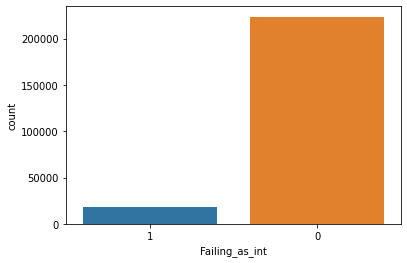

In [12]:
#target cat are uneven -> using stratify for the split
#Stratify samples the train and test data in such a way, that the same ratios of positive and negative labels occur in train and test data
sns.countplot(x=y)

In [13]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                 test_size=0.20,
#                                                 stratify=y,
#                                                 random_state=RSEED)

In [14]:
#create a train/test split with serials based on dummies (80/20)
#creat a list of the separated serials + create a pd.series
RSEED = 200
serial_number_train, serial_number_test, dummy_train, dummy_test = train_test_split(df1['Serial_unique'], df1['Serial_unique'], test_size=0.2, random_state=RSEED)
serial_number_train = pd.Series(serial_number_train)
serial_number_test = pd.Series(serial_number_test)

In [15]:
#
df_train = HDD_ST4000DM000[HDD_ST4000DM000["serial_number"].isin(serial_number_train)]
y_train = df_train["Failing_as_int"]
X_train = df_train.drop(["Failing_as_int", "countdown"], axis=1)

X_train.query('failure == 1').count()
X_train.query('failure == 1').nunique()

date                    332
serial_number           486
model                     1
failure                   1
smart_1_normalized       31
smart_1_raw             486
smart_3_normalized        9
smart_4_raw              44
smart_5_normalized       19
smart_5_raw              98
smart_7_normalized       27
smart_7_raw             486
smart_9_normalized       31
smart_9_raw             478
smart_12_raw             42
smart_183_normalized     41
smart_183_raw            53
smart_184_normalized     28
smart_184_raw            31
smart_187_normalized     86
smart_187_raw           148
smart_188_normalized      1
smart_188_raw            13
smart_189_normalized      2
smart_189_raw             2
smart_190_normalized     30
smart_190_raw            30
smart_192_raw            17
smart_193_normalized     39
smart_193_raw           482
smart_194_normalized     30
smart_194_raw            30
smart_197_normalized     26
smart_197_raw            90
smart_198_normalized     26
smart_198_raw       

In [16]:
df_test = HDD_ST4000DM000[HDD_ST4000DM000["serial_number"].isin(serial_number_test)]
y_test = df_test["Failing_as_int"]
X_test = df_test.drop(["Failing_as_int", "countdown"], axis=1)

In [17]:
#checking for duplicates
a = X_train.query('failure == 1')['serial_number'].to_list()
print(len(a))
a_set = set(a)
print(len(a_set))
a_dup=[]
for serial in a_set:
    a.remove(serial)
print(a)

488
486
['Z302SQFX', 'Z303VDR4']


In [18]:
# query the duplicates (SAME SERIALS WITH FAIL = 1) and add them to a list (there are only 2 of each)
duplicate = X_train.query("serial_number == 'Z302SQFX' and failure == 1").index.values.tolist()
duplicate_2 = X_train.query("serial_number == 'Z303VDR4' and failure == 1").index.values.tolist()
duplicate_2 

#remove last item from created lists
drop_rows = duplicate.pop() 
drop_rows2 = duplicate_2.pop()

#drop the created rows
X_train.drop(drop_rows, axis=0, inplace=True)
X_train.drop(drop_rows2, axis=0, inplace=True)

In [19]:
# We have a look on the all the duplicates identified by the Serial column
X_train["serial_number"].duplicated()
duplicate_id = X_train.groupby("serial_number").size().to_frame('Count').reset_index()
duplicate_id = duplicate_id.sort_values('Count', ascending=False)
duplicate_id.head(10)

,serial_number,Count
269,Z304GSQ0,732
411,Z305AQQP,731
161,Z302SWBN,727
474,Z305K296,725
485,Z307XHRJ,723
115,W301BY50,721
284,Z304HWNT,721
118,Z3026ZSL,720
368,Z304KQXL,720
479,Z305MM0G,720


<AxesSubplot:xlabel='Failing_as_int', ylabel='count'>

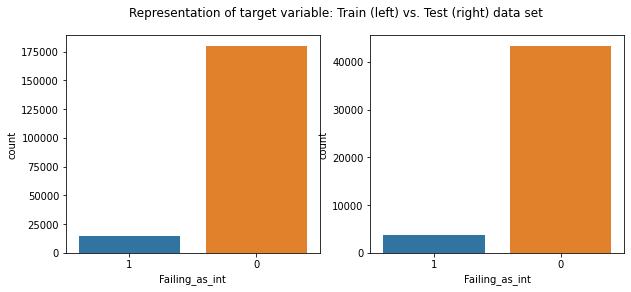

In [20]:
# Visualize y_train and y_test after splitting
fig, axes = plt.subplots(1,2, figsize=(10, 4))
fig.suptitle("Representation of target variable: Train (left) vs. Test (right) data set")
sns.countplot(x=y_train, ax=axes[0])
sns.countplot(x=y_test, ax=axes[1])

In [21]:
# Show dimensions of train and testing data
print(X_train.shape)
print(X_test.shape)

(194721, 41)
(47147, 41)


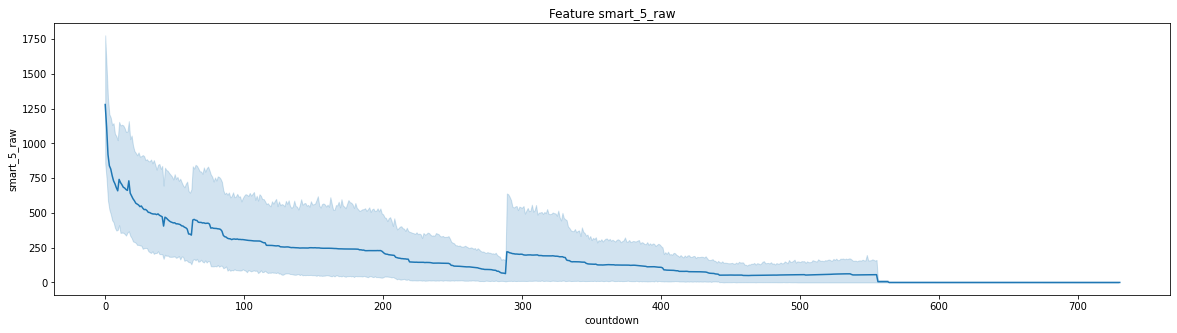

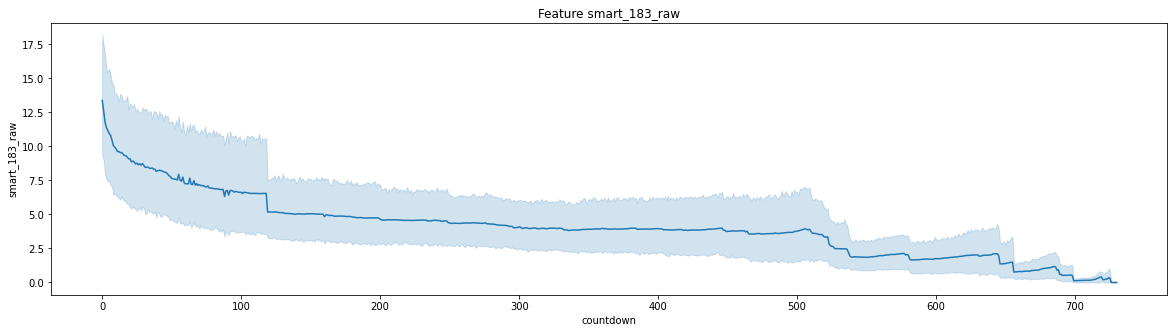

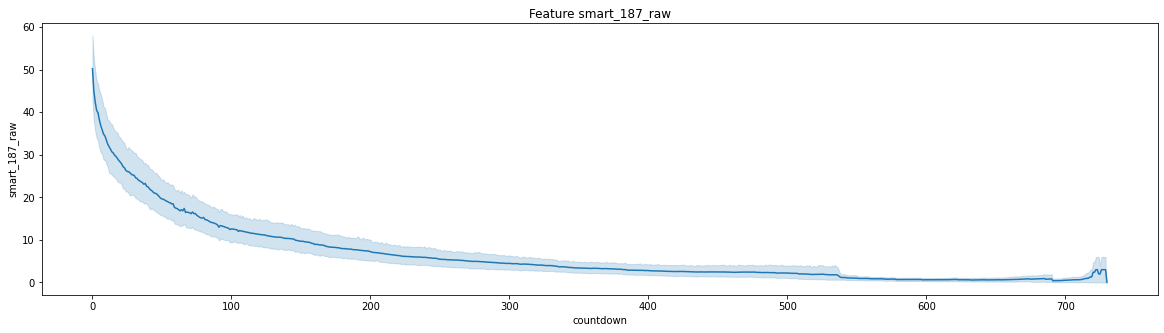

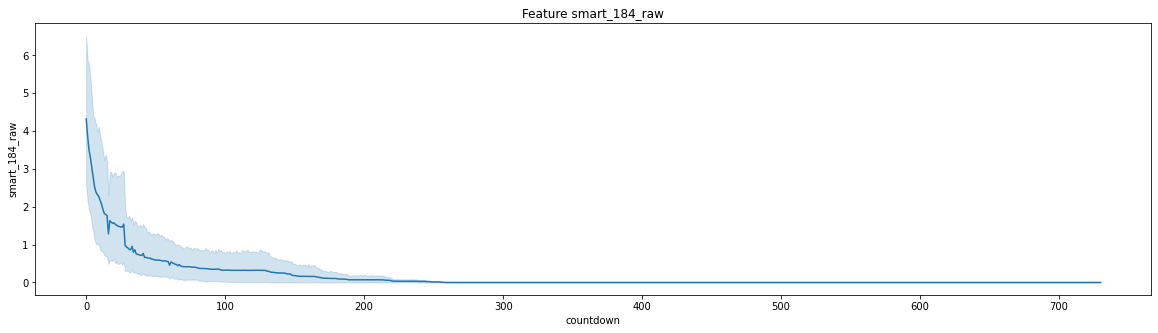

In [22]:
# plt.figure(figsize=(20,5))
# sns.lineplot(data=test_model_history, x='countdown', y=columns[3]);

for feature in features_baseline:
    plt.subplots(1, 1, figsize=(20, 5))
    g = sns.lineplot(data=HDD_ST4000DM000, x='countdown', y=feature)
    g.set_title(f'Feature {feature}')

### Baseline Model


In [24]:
# set the chosen days for failure as target and create a dic for the queried tresholds
time_window = 30
treshold = {}

#Baseline model
df_time_windows = HDD_ST4000DM000.query("countdown ==@ time_window")
for feat in features_baseline:
    treshold[feat] = df_time_windows[feat].median()
treshold

{'smart_5_raw': 0.0,
 'smart_183_raw': 1.0,
 'smart_187_raw': 2.0,
 'smart_184_raw': 0.0}

In [25]:
X_test_BL = X_test[features_baseline]
X_train_BL = X_train[features_baseline]

In [26]:
# if at least 3 features are "True" (each gets an 1) it will reach 3 and therefore there will be a prediction
num_above_treshold = 3
y_pred = (X_test_BL > treshold).sum(axis=1) > (num_above_treshold-1)
y_pred_train = (X_train_BL > treshold).sum(axis=1) > (num_above_treshold-1)

Fbeta score with higher weighted recall:  0.209
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     43382
           1       0.29      0.19      0.23      3765

    accuracy                           0.90     47147
   macro avg       0.61      0.58      0.59     47147
weighted avg       0.88      0.90      0.89     47147

Roc_auc_score:  0.5767939598084235


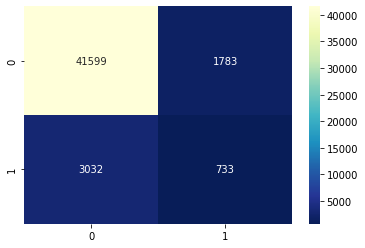

In [28]:
#evaluate the baseline model and checking the classification metrics
print("Fbeta score with higher weighted recall: ", fbeta_score(y_test, y_pred, beta=2).round(3))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Roc_auc_score: ",roc_auc_score(y_test, y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

sns.heatmap(cm, cmap="YlGnBu_r", annot=True, fmt=".0f");

## Preparing the data

### Scaling based on X_train

## Building and Testing the models